# Introduction
I'll build a model with logistic regression, SVM and random forest by using sklearn.  
And I'll evaluate the three models and consider which one to choose.

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['heart.csv']


In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score
import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings(action='ignore', category=ConvergenceWarning)
warnings.filterwarnings(action='ignore', category=DeprecationWarning)

## Load and check the dataset

In [3]:
data = pd.read_csv('../input/heart.csv')

In [4]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
data.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [6]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


All columns are numerical.  
However, there are columns that should be treated as categories rather than numbers. 

In [7]:
data['cp'] = data['cp'].astype(object)
data['restecg'] = data['restecg'].astype(object)
data['slope'] = data['slope'].astype(object)
data['ca'] = data['ca'].astype(object)
data['thal'] = data['thal'].astype(object)
data = pd.get_dummies(data,drop_first=True)
data.head()

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,target,cp_1,cp_2,cp_3,restecg_1,restecg_2,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,63,1,145,233,1,150,0,2.3,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0
1,37,1,130,250,0,187,0,3.5,1,0,1,0,1,0,0,0,0,0,0,0,0,1,0
2,41,0,130,204,0,172,0,1.4,1,1,0,0,0,0,0,1,0,0,0,0,0,1,0
3,56,1,120,236,0,178,0,0.8,1,1,0,0,1,0,0,1,0,0,0,0,0,1,0
4,57,0,120,354,0,163,1,0.6,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0


In [8]:
target = data['target']

In [9]:
data = data.drop(columns='target')

In [10]:
X_train,X_test,Y_train,Y_test = train_test_split(data,target,random_state=0)
scaler = StandardScaler()
scaler.fit(X_train)
# Logistic Regression and SVM use scaled data.
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

/opt/conda/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:5: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  """
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:6: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  


This time I'll compare the performance of Logistic Regression, SVM and Random Forest.  
*In the code, it is abbreviated as follows.  
Logistic Regression : LR  
SVM: SVM  
Random Forest : RF  

## Train three models

In [11]:

# LogisticRegression Train
param_grid = {'C':[0.001,0.01,0.1,1,10,100],
              'solver':['lbfgs','liblinear','sag','saga'],
              'max_iter':[1,5,10,25,50,75,100,125,150]}

lr = GridSearchCV(LogisticRegression(random_state=0),param_grid,cv=5)
lr.fit(X_train_scaled,Y_train)

# SVM Train
param_grid = {'C':[0.001,0.01,0.1,1,10,100],
             'gamma':[0.001,0.01,0.1,1,10,100]}


svm = GridSearchCV(SVC(),param_grid,cv=5)
svm.fit(X_train_scaled,Y_train)

# RandomForest Train
# When the depth is 2 or more, it becomes over fitting.
param_grid = {'n_estimators':[10,25,50,75,100,125,150],
              'max_depth':[1]}

rf = GridSearchCV(RandomForestClassifier(random_state=0),param_grid,cv=5)
rf.fit(X_train,Y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': [10, 25, 50, 75, 100, 125, 150], 'max_depth': [1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [12]:
print('LogisticRegression train set score: {:.2f}'.format(lr.score(X_train_scaled,Y_train)))
print('LogisticRegression test set score: {:.2f}'.format(lr.score(X_test_scaled,Y_test)))
print('LogisticRegression best paramerters: {}'.format(lr.best_params_))

print('SVM train set score: {:.2f}'.format(svm.score(X_train_scaled,Y_train)))
print('SVM test set score: {:.2f}'.format(svm.score(X_test_scaled,Y_test)))
print('SVM best paramerters: {}'.format(svm.best_params_))

print('RandomForest train set score: {:.2f}'.format(rf.score(X_train,Y_train)))
print('RandomForest test set score: {:.2f}'.format(rf.score(X_test,Y_test)))
print('RandomForest best paramerters: {}'.format(rf.best_params_))

LogisticRegression train set score: 0.87
LogisticRegression test set score: 0.86
LogisticRegression best paramerters: {'C': 0.1, 'max_iter': 5, 'solver': 'liblinear'}
SVM train set score: 0.84
SVM test set score: 0.83
SVM best paramerters: {'C': 0.1, 'gamma': 0.01}
RandomForest train set score: 0.81
RandomForest test set score: 0.79
RandomForest best paramerters: {'max_depth': 1, 'n_estimators': 125}


**Logistic regression has the best result. **  
Next, check the result of cross validation.  

## Check cross-validation score

In [13]:

data = pd.concat([X_train,X_test])
data_scaled = np.concatenate([X_train_scaled,X_test_scaled])
target = pd.concat([Y_train,Y_test])
lr_scores = cross_val_score(lr,data_scaled,target,cv=5)
svm_scores = cross_val_score(svm,data_scaled,target,cv=5)
rf_scores = cross_val_score(rf,data,target,cv=5)

In [14]:
print('LR Cross-validation scores: ',lr_scores)
print('LR Mean Cross-validation scores: ',lr_scores.mean())

print('SVM Cross-validation scores: ',svm_scores)
print('SVM Mean Cross-validation scores: ',svm_scores.mean())

print('RF Cross-validation scores: ',rf_scores)
print('RF Mean Cross-validation scores: ',rf_scores.mean())

LR Cross-validation scores:  [0.83606557 0.86885246 0.81967213 0.81666667 0.86666667]
LR Mean Cross-validation scores:  0.8415846994535521
SVM Cross-validation scores:  [0.81967213 0.85245902 0.81967213 0.8        0.86666667]
SVM Mean Cross-validation scores:  0.8316939890710383
RF Cross-validation scores:  [0.70491803 0.81967213 0.85245902 0.76666667 0.78333333]
RF Mean Cross-validation scores:  0.7854098360655738



**As a result of cross validation, the result of logistic regression is the best.**  
I'll analyze the results from different perspectives.  

## Check precision , recall and f1-score 

In [15]:
predict = lr.predict(X_test_scaled)
print("---Classification Report about LR---")
print(classification_report(Y_test,predict))

---Classification Report about LR---
              precision    recall  f1-score   support

           0       0.87      0.79      0.83        33
           1       0.85      0.91      0.88        43

   micro avg       0.86      0.86      0.86        76
   macro avg       0.86      0.85      0.85        76
weighted avg       0.86      0.86      0.85        76



In [16]:
predict = svm.predict(X_test_scaled)
print("---Classification Report about SVM---")
print(classification_report(Y_test,predict))

---Classification Report about SVM---
              precision    recall  f1-score   support

           0       0.83      0.76      0.79        33
           1       0.83      0.88      0.85        43

   micro avg       0.83      0.83      0.83        76
   macro avg       0.83      0.82      0.82        76
weighted avg       0.83      0.83      0.83        76



In [17]:
predict = rf.predict(X_test)
print("---Classification Report about RF---")
print(classification_report(Y_test,predict))

---Classification Report about RF---
              precision    recall  f1-score   support

           0       0.81      0.67      0.73        33
           1       0.78      0.88      0.83        43

   micro avg       0.79      0.79      0.79        76
   macro avg       0.80      0.78      0.78        76
weighted avg       0.79      0.79      0.79        76




The above shows **precision, recall, f1-score** of the three models.  
  
I'll clarify each definition.  
![](https://cdn-ak.f.st-hatena.com/images/fotolife/p/protoidea/20190210/20190210130811.png)  
  
**precision = TP/(TP + FP)  
recall = TP/(TP+FN)  
f1-score = 2 * (precision * recall)/(presion + recall)  
TPR = recall  
FPR = FP/(FP + TN)**  
  
Next, let's check the precision-recall-curve and ROC-curve.

## Check precision-recall-curve and ROC-curve

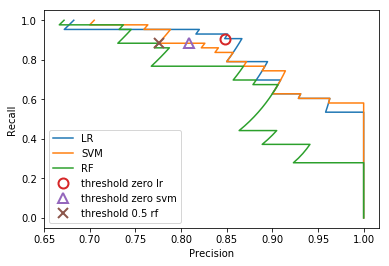

In [18]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_recall_curve
precision_lr,recall_lr,thresholds_lr = precision_recall_curve(Y_test,lr.decision_function(X_test_scaled))
precision_svm,recall_svm,thresholds_svm = precision_recall_curve(Y_test,svm.decision_function(X_test_scaled))
precision_rf,recall_rf,thresholds_rf = precision_recall_curve(Y_test,rf.predict_proba(X_test)[:,1])

plt.plot(precision_lr,recall_lr,label='LR')
plt.plot(precision_svm,recall_svm,label='SVM')
plt.plot(precision_rf,recall_rf,label='RF')

close_zero_lr = np.argmin(np.abs(thresholds_lr))
close_zero_svm = np.argmin(np.abs(thresholds_svm))
close_default_rf = np.argmin(np.abs(thresholds_rf -0.5))

plt.plot(precision_lr[close_zero_lr],recall_lr[close_zero_lr],'o',markersize=10,label="threshold zero lr",fillstyle="none",mew=2)
plt.plot(precision_svm[close_zero_svm],recall_svm[close_zero_svm],'^',markersize=10,label="threshold zero svm",fillstyle="none",mew=2)
plt.plot(precision_rf[close_default_rf],recall_rf[close_default_rf],'x',markersize=10,label="threshold 0.5 rf",fillstyle="none",mew=2)

plt.xlabel('Precision')
plt.ylabel('Recall')
plt.legend()


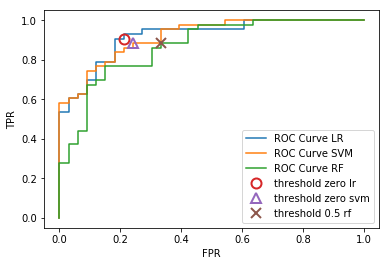

In [19]:
fpr_lr,tpr_lr,thresholds_lr = roc_curve(Y_test,lr.decision_function(X_test_scaled))
fpr_svm,tpr_svm,thresholds_svm = roc_curve(Y_test,svm.decision_function(X_test_scaled))
fpr_rf,tpr_rf,thresholds_rf = roc_curve(Y_test,rf.predict_proba(X_test)[:,1])

plt.plot(fpr_lr,tpr_lr,label="ROC Curve LR")
plt.plot(fpr_svm,tpr_svm,label="ROC Curve SVM")
plt.plot(fpr_rf,tpr_rf,label="ROC Curve RF")

close_zero_lr = np.argmin(np.abs(thresholds_lr))
close_zero_svm = np.argmin(np.abs(thresholds_svm))
close_default_rf = np.argmin(np.abs(thresholds_rf -0.5))

plt.plot(fpr_lr[close_zero_lr],tpr_lr[close_zero_lr],'o',markersize=10,label="threshold zero lr",fillstyle="none",mew=2)
plt.plot(fpr_svm[close_zero_svm],tpr_svm[close_zero_svm],'^',markersize=10,label="threshold zero svm",fillstyle="none",mew=2)
plt.plot(fpr_rf[close_default_rf],tpr_rf[close_default_rf],'x',markersize=10,label="threshold 0.5 rf",fillstyle="none",mew=2)

plt.xlabel("FPR")
plt.ylabel("TPR")
plt.legend(loc=4)


Logistic regression and SVM have marked a threshold of 0, marking 0.5 in random forest.  
Logistic regression has good results in total.  
But, if you want to raise 'recall', it seems better to use SVM.  
I guess that  **It is important to increase 'recall' in this problem** , because It is dangerous to mistakenly predict that heart disease is not a heart disease.  
I think we should choose SVM that can increase recall while keeping precison high.